In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [70]:
df=pd.read_csv("mcdonalds.csv")

In [71]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [72]:
list(df.columns)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [74]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [75]:
df.describe(include=["object"])

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


In [76]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

there is no null values present in the dataset

In [77]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1448    False
1449    False
1450    False
1451    False
1452    False
Length: 1453, dtype: bool

In [78]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)


     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
404    Yes        Yes    No        No     No  Yes   Yes   Yes        No   
421    Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes   
441     No        Yes    No       Yes     No  Yes   Yes    No        No   
453    Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
598     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
674    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
710    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
725     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
741    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
744    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
745    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
774    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
799    Yes        Yes    

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
# Summary statistics for numerical attributes
print(df[['Like', 'Age']].describe())
print()

# Unique values and their counts for categorical attributes
categorical_attributes = ['VisitFrequency', 'Gender']
for col in categorical_attributes:
    print(col, ":", df[col].unique())
    print(df[col].value_counts())
    print()


               Age
count  1431.000000
mean     44.656184
std      14.199400
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000

VisitFrequency : ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

Gender : ['Female' 'Male']
Female    772
Male      659
Name: Gender, dtype: int64



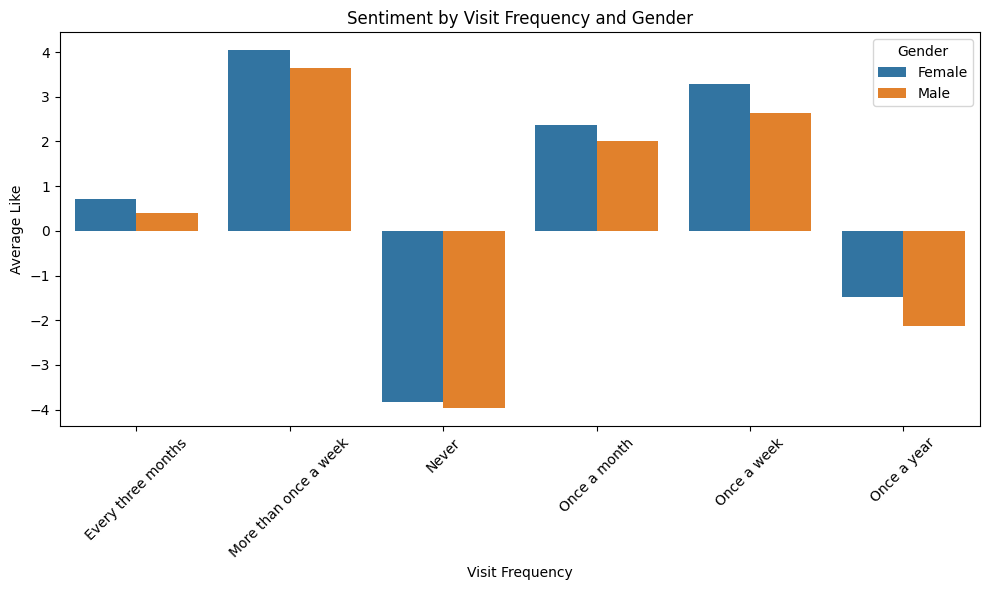

In [81]:
import re
# Clean the 'Like' column by extracting numeric values
df['Like'] = df['Like'].apply(lambda x: int(re.search(r'-?\d+', x).group()))

# Grouping and calculating average Like sentiment by VisitFrequency and Gender
grouped = df.groupby(['VisitFrequency', 'Gender'])['Like'].mean().reset_index()

# Visualization: Bar plot of sentiment (Like) by VisitFrequency
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='VisitFrequency', y='Like', hue='Gender')
plt.title('Sentiment by Visit Frequency and Gender')
plt.xlabel('Visit Frequency')
plt.ylabel('Average Like')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


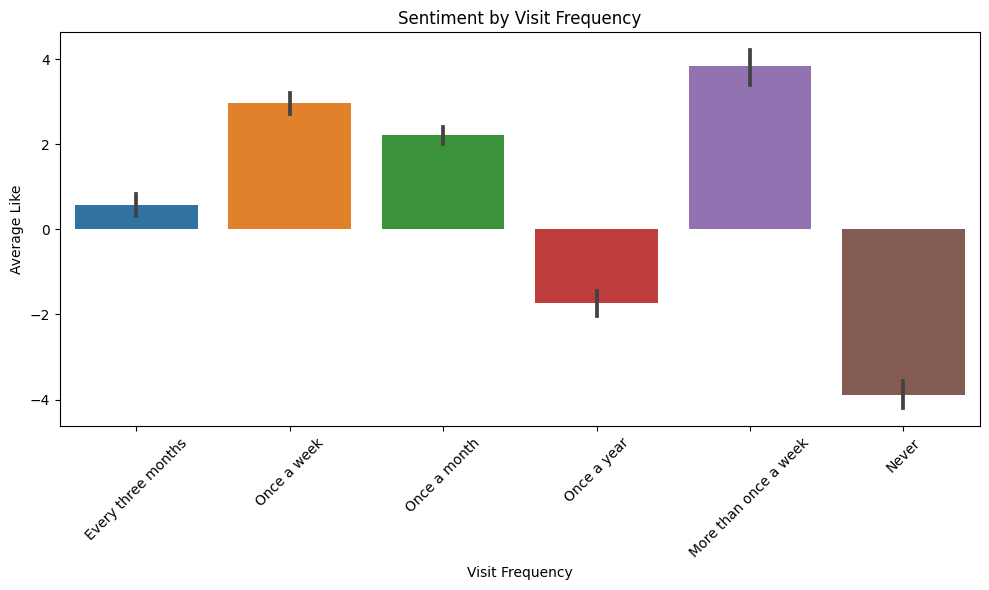

In [82]:
# Visualization: Bar plot of sentiment (Like) by VisitFrequency
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='VisitFrequency', y='Like')
plt.title('Sentiment by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Average Like')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

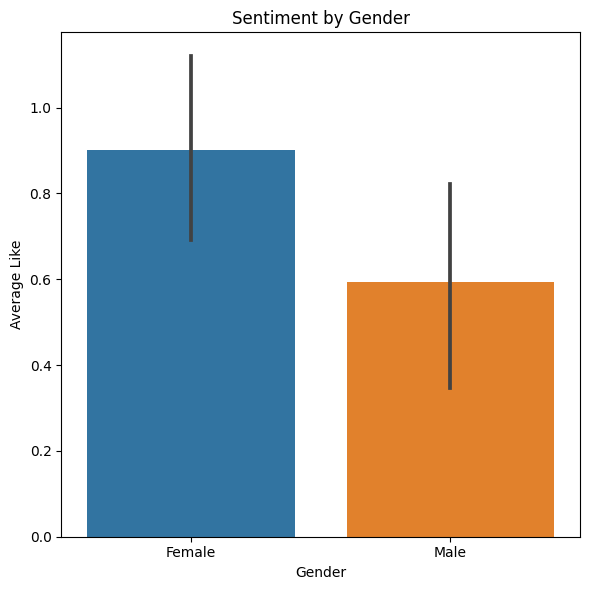

In [83]:
# Visualization: Bar plot of sentiment (Like) by Gender
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Gender', y='Like')
plt.title('Sentiment by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Like')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

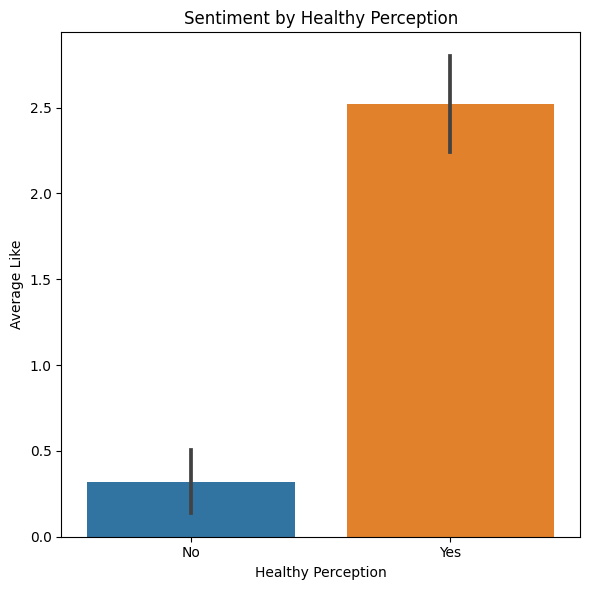

In [84]:
# Visualization: Bar plot of sentiment (Like) by Healthy perception
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='healthy', y='Like')
plt.title('Sentiment by Healthy Perception')
plt.xlabel('Healthy Perception')
plt.ylabel('Average Like')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [85]:
categorical_columns = ['VisitFrequency', 'Gender', 'spicy', 'tasty', 'healthy', 'greasy', 'convenient']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'Like']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the preprocessed DataFrame
print(df_encoded.head())

  yummy fattening fast cheap expensive disgusting      Like       Age  \
0    No       Yes  Yes   Yes       Yes         No -1.206517  1.151424   
1   Yes       Yes  Yes   Yes       Yes         No  0.398359  0.446923   
2    No       Yes  Yes    No       Yes         No  0.077384  1.221874   
3   Yes       Yes  Yes   Yes        No        Yes  1.040309  1.715025   
4    No       Yes  Yes   Yes        No         No  0.398359  0.306022   

   VisitFrequency_More than once a week  VisitFrequency_Never  \
0                                     0                     0   
1                                     0                     0   
2                                     0                     0   
3                                     0                     0   
4                                     0                     0   

   VisitFrequency_Once a month  VisitFrequency_Once a week  \
0                            0                           0   
1                            0                

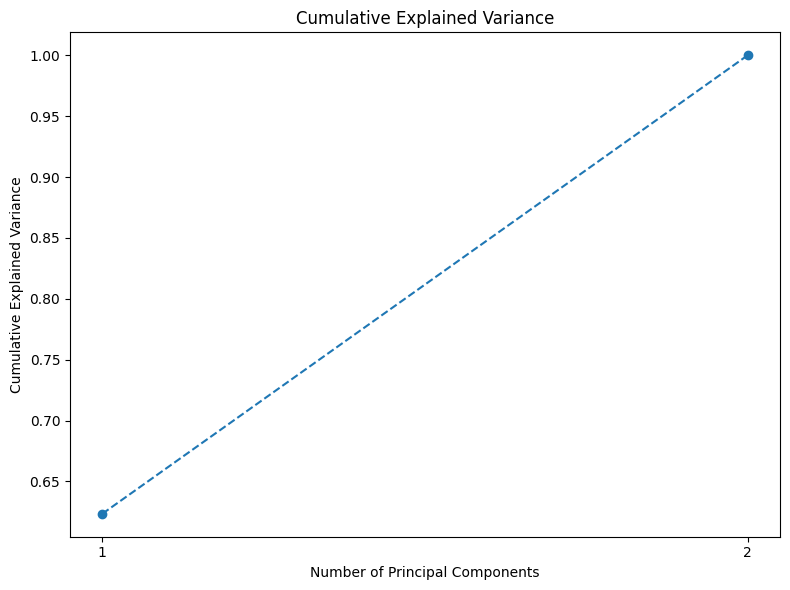

In [86]:
from sklearn.decomposition import PCA
numerical_columns = ['Age', 'Like']
data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.tight_layout()
plt.show()

In [87]:
# Select the number of components based on the plot
# For example, let's say we want to retain 95% of the variance
num_components = len(cumulative_explained_variance[cumulative_explained_variance <= 0.95]) + 1

# Perform PCA with the selected number of components
pca_final = PCA(n_components=num_components)
data_pca = pca_final.fit_transform(data_scaled)

# Create a DataFrame with the PCA components
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data_pca, columns=pca_columns)

# Display the PCA-transformed data
print(df_pca.head())

        PC1       PC2
0  1.667316  0.038957
1  0.034340 -0.597704
2  0.809277 -0.918714
3  0.477096 -1.948316
4 -0.065292 -0.498073
